In [110]:
#a. Generate 5 uncorrelated Gaussian random variables that simulate yield changes
#(they can be positive or negative with a mean close to 0 and a standard deviation that is small).


In [111]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
#import yfinance as yfin

from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from scipy import stats

In [112]:
# Generate 5 uncorrelated Gaussian random variables
mean = 0.0
std_dev = 0.01  # Small standard deviation
num_variables = 5
num_samples = 1000

data = np.random.normal(mean, std_dev, size=(num_samples, num_variables))
df = pd.DataFrame(data, columns=[f"Component{i+1}" for i in range(num_variables)])
print (df.head())

   Component1  Component2  Component3  Component4  Component5
0    0.009379    0.006945   -0.005449    0.001221   -0.009690
1   -0.006246   -0.014656    0.011113   -0.003453   -0.009680
2    0.001702    0.012541   -0.013634   -0.000196    0.010884
3   -0.004444   -0.033583   -0.013274   -0.008160   -0.003232
4    0.023149    0.005328   -0.015286   -0.006513    0.006781


In [113]:
#yield_changes = np.random.normal(loc=mean, scale=std_dev, size=num_variables)


In [114]:
#print("Simulated yield changes:", yield_changes)

In [115]:
#b. Run a Principal Components using EITHER the correlation OR covariance matrix.

In [116]:
#correlation 
print(round(df.corr(), 5))

            Component1  Component2  Component3  Component4  Component5
Component1     1.00000    -0.00293    -0.06272    -0.03336    -0.02200
Component2    -0.00293     1.00000    -0.03346    -0.02952    -0.01490
Component3    -0.06272    -0.03346     1.00000     0.02015     0.01426
Component4    -0.03336    -0.02952     0.02015     1.00000     0.00538
Component5    -0.02200    -0.01490     0.01426     0.00538     1.00000


In [117]:
# covariance matrix
df.cov()

,Component1,Component2,Component3,Component4,Component5
Component1,9.592511e-05,-2.860693e-07,-0.000006,-3.280968e-06,-2.145022e-06
Component2,-2.860693e-07,9.908812e-05,-0.000003,-2.950351e-06,-1.476100e-06
Component3,-6.304955e-06,-3.418290e-06,0.000105,2.076295e-06,1.456601e-06
Component4,-3.280968e-06,-2.950351e-06,0.000002,1.008108e-04,5.378820e-07
Component5,-2.145022e-06,-1.476100e-06,0.000001,5.378820e-07,9.908362e-05


In [118]:
# Perform PCA
pca = PCA()
pca.fit(df)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [119]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

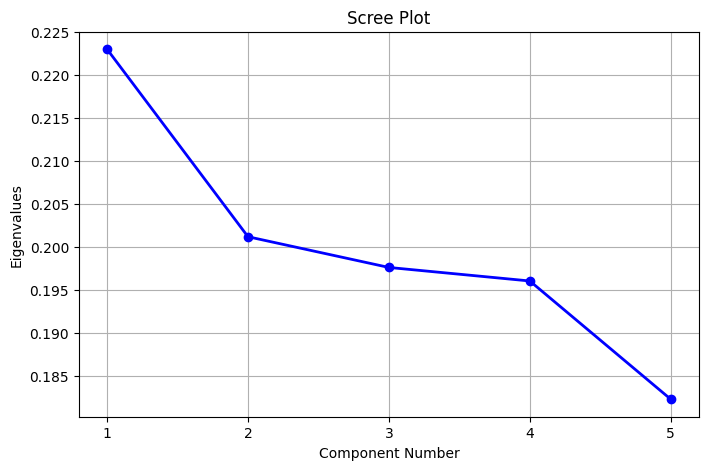

In [120]:
# Scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'o-', linewidth=2, color='blue')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()